In [49]:
#Étape 1 : Prétraitement des données

#1.1 Chargement des données

#Utilisons pandas pour charger les fichiers bank-full.csv et bank.csv.

In [50]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

In [51]:
# Chargement des données
train_data = pd.read_csv('bank-full.csv', sep=';')
test_data = pd.read_csv('bank.csv', sep=';')

In [52]:
train_data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [53]:
#1.2 Exploration des données

#Examinons les types de données, les valeurs manquantes, les statistiques descriptives et
#l'existence des valeurs abérantes ou non.

In [54]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [55]:
train_data.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


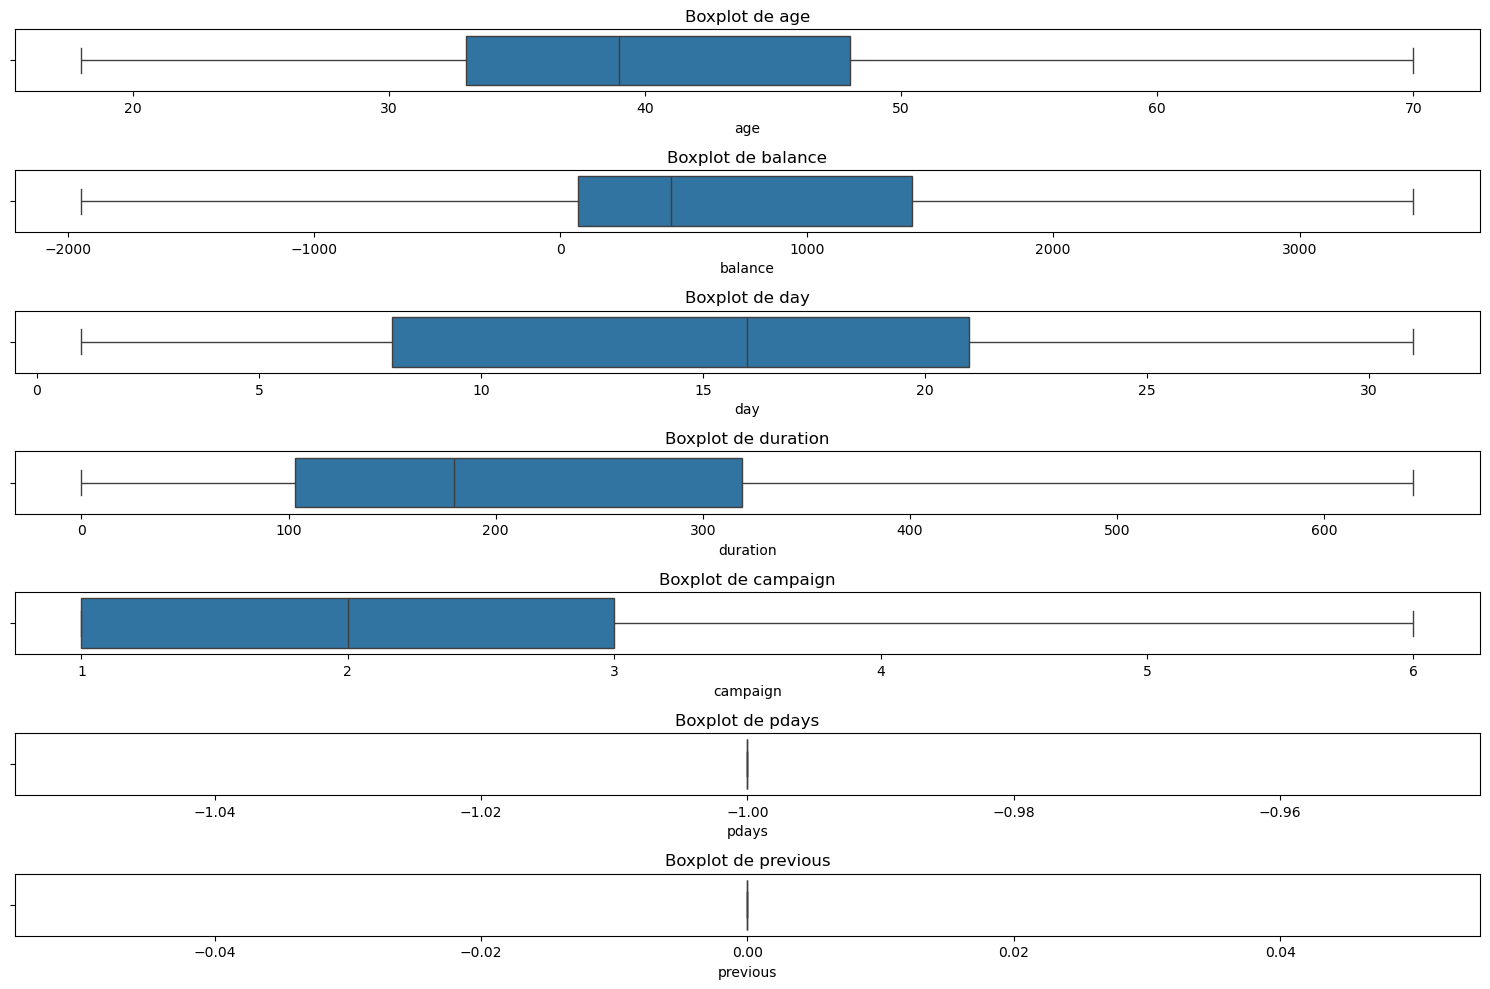

In [56]:
import matplotlib.pyplot as plt
import seaborn as sns

# Taille de la figure
plt.figure(figsize=(15, 10))

# Itération à travers les colonnes numériques du DataFrame
numeric_columns = train_data.select_dtypes(include=['float64', 'int64']).columns

for i, column in enumerate(numeric_columns):
    plt.subplot(len(numeric_columns), 1, i + 1)  # Crée un sous-graphique pour chaque variable
    sns.boxplot(x=column, data=train_data, showfliers=False)
    plt.title(f'Boxplot de {column}')
    #plt.xlabel('Variable')
    #plt.ylabel(column)

plt.tight_layout()  # Ajuste l'espacement entre les sous-graphes
plt.show()

In [57]:
#1.3 Nettoyage des données

#Gestion des valeurs manquantes : Apres 

In [58]:
#Étape 2 : Sélection et transformation des données

In [59]:
#2.1 Préparation de pipelines spécifiques

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

# 2. Définir les caractéristiques (X) et la cible (y)
X_train = train_data.drop('y', axis=1)  # Séparation de la variable cible pour l'entraînement
y_train = train_data['y']

# X_test et y_test pour le jeu de test
X_test = test_data.drop('y', axis=1)
y_test = test_data['y']



#Colonnes à traiter
num_columns = ["age", "balance", "day", "duration", "campaign", "pdays", "previous"]
cat_columns = ["job", "marital", "education", "default", "housing", "loan", "contact", "month", "poutcome"]

#Préparation des sous-pipelines
pipeline_num = Pipeline([
    ('imputation', SimpleImputer(strategy='mean')),
    ('scaling', StandardScaler())
])
pipeline_cat = Pipeline([
    ('encoding', OneHotEncoder())
])

#2.2 Combinons le traitement
# Combine les traitements dans un seul object

preprocessor = ColumnTransformer([
    ('num', pipeline_num, num_columns),
    ('cat', pipeline_cat, cat_columns)
])

#2.3 Application sur le jeu de données
#Application sur tout le DataFrame

data_transformed = preprocessor.fit_transform(train_data)
data_transformed

array([[ 1.60696496,  0.25641925, -1.29847633, ...,  0.        ,
         0.        ,  1.        ],
       [ 0.28852927, -0.43789469, -1.29847633, ...,  0.        ,
         0.        ,  1.        ],
       [-0.74738448, -0.44676247, -1.29847633, ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [ 2.92540065,  1.42959305,  0.14341818, ...,  0.        ,
         1.        ,  0.        ],
       [ 1.51279098, -0.22802402,  0.14341818, ...,  0.        ,
         0.        ,  1.        ],
       [-0.37068857,  0.52836436,  0.14341818, ...,  1.        ,
         0.        ,  0.        ]])

In [60]:
#Étape 3 : Modélisation et prédiction

#3.1 Combinons les étapes de préparation des données et d’apprentissage automatique dans une seule
#structure cohérente et automatisée.

#Choisissons un modèle d'apprentissage supervisé adapté, comme un Random Forest.

In [61]:
from sklearn.ensemble import RandomForestClassifier

# Entraîne un modèle sur les données prétraitées
model_pipeline = Pipeline([
    ('preprocessing', preprocessor),   # ColumnTransformer complet
    ('model', RandomForestClassifier(random_state=42))   #Le modèle d'apprentissage
])

model_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputation',
                                                                   SimpleImputer()),
                                                                  ('scaling',
                                                                   StandardScaler())]),
                                                  ['age', 'balance', 'day',
                                                   'duration', 'campaign',
                                                   'pdays', 'previous']),
                                                 ('cat',
                                                  Pipeline(steps=[('encoding',
                                                                   OneHotEncoder())]),
                                                  ['job', 'marital',
                                                   'education', 'default',
                                                   'housing', 'loan', 'contact',
                                                   'month', 'poutcome'])])),
                ('model', RandomForestClassifier(random_state=42))])

In [64]:
# 3.2 Prédiction sur les données de test
y_pred = model_pipeline.predict(X_test)

# Afficher les prédictions
y_pred

array(['no', 'no', 'no', ..., 'no', 'no', 'no'], dtype=object)

In [63]:
# Évaluation du modèle

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 1.0
              precision    recall  f1-score   support

          no       1.00      1.00      1.00      4000
         yes       1.00      1.00      1.00       521

    accuracy                           1.00      4521
   macro avg       1.00      1.00      1.00      4521
weighted avg       1.00      1.00      1.00      4521



In [ ]:
'''
Une précision de 1.0 (ou 100%) et des scores de rappel et de F1 de 1.0 pour toutes les classes indiquent que notre modèle a parfaitement réussi à prédire toutes les instances dans le jeu de test. Bien que cela puisse sembler impressionnant, plusieurs facteurs doivent être examinés :

Points à Considérer :
Surapprentissage (Overfitting) :

Si notre modèle est trop complexe par rapport à la quantité de données, il peut avoir mémorisé les exemples d'entraînement au lieu d'apprendre à généraliser. Cela peut entraîner une performance parfaite sur le jeu de test, mais une mauvaise performance sur de nouvelles données.

Métriques Additionnelles :

Utilisez d'autres métriques pour évaluer les performances, en particulier si les classes sont déséquilibrées. Des métriques comme l'aire sous la courbe ROC (AUC-ROC) peuvent fournir une meilleure vue d'ensemble des performances du modèle.

Conclusion
Une précision parfaite peut sembler idéale, mais il est crucial d'examiner les raisons sous-jacentes. En suivant les étapes mentionnées ci-dessus, nous pourrons mieux évaluer la performance de notre modèle et identifier des domaines d'amélioration.
'''